# Lab Task: Classification using Neural Networks in PyTorch (Iris Dataset)
### Objective:
In this task, you will build a neural network for classifying the Iris dataset. The task is divided into five clear parts.

## Dataset:
You will use the **Iris dataset** (available in `sklearn.datasets`). It has 4 features:
- `sepal length`
- `sepal width`
- `petal length`
- `petal width`

And 3 target classes:
- Setosa (0)
- Versicolour (1)
- Virginica (2)

## PART 1: Data Preprocessing

Perform the following steps:
1. Load the dataset using `sklearn.datasets.load_iris()`.
2. Convert it to a Pandas DataFrame.
3. Shuffle the dataset.
4. Check for missing values.
5. Normalize the feature columns using `StandardScaler`.
6. Split the data into **80% training** and **20% testing**.
7. Convert the data into PyTorch tensors.

In [1]:
# TODO BY STUDENTS: Import required libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

In [2]:
# TODO: Preprocess the Iris dataset step-by-step
# Load Iris dataset
iris = datasets.load_iris()

# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Separate features and target
X = df[iris.feature_names].values
y = df['target'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Verify shapes
print("Training set shape:", X_train_tensor.shape)
print("Test set shape:", X_test_tensor.shape)

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
Training set shape: torch.Size([120, 4])
Test set shape: torch.Size([30, 4])


## Feedforward Neural Network

Build a PyTorch neural network with the following architecture:

- Input Layer: 4 neurons
- Hidden Layer 1: 10 neurons + ReLU
- Output Layer: 3 neurons (no activation here, handled by loss function)

Use `nn.CrossEntropyLoss()` as the loss function.

In [3]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 10)  # Input to hidden layer
        self.fc2 = nn.Linear(10, 3)  # Hidden to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model_1 = Net()

## PART 2: Modify Architecture

Update your model as follows:
- Input Layer: 4 neurons (unchanged)
- Hidden Layer 1: 16 neurons + ReLU
- Hidden Layer 2: 8 neurons + ReLU
- Output Layer: 3 neurons

In [4]:
class NetModified(nn.Module):
    def __init__(self):
        super(NetModified, self).__init__()
        self.fc1 = nn.Linear(4, 16)   # Input to first hidden layer
        self.fc2 = nn.Linear(16, 8)   # First to second hidden layer
        self.fc3 = nn.Linear(8, 3)    # Second hidden to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model_2 = NetModified()

## PART 3: Apply Optimizer and Train models

Use the following settings:
- Optimizer: **Adam**
- Learning Rate: `0.01`
- Number of Epochs: `300`

Train the updated model and log loss.

Model 1 - Epoch [50/300], Loss: 0.3000
Model 1 - Epoch [100/300], Loss: 0.1045
Model 1 - Epoch [150/300], Loss: 0.0672
Model 1 - Epoch [200/300], Loss: 0.0566
Model 1 - Epoch [250/300], Loss: 0.0519
Model 1 - Epoch [300/300], Loss: 0.0492


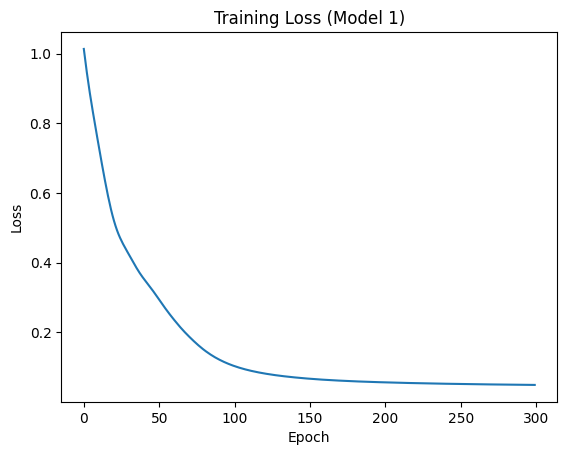

In [5]:
import torch.optim as optim
import matplotlib.pyplot as plt

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_1.parameters(), lr=0.01)

# Training loop
epochs = 300
losses_1 = []

for epoch in range(epochs):
    model_1.train()
    y_pred = model_1(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses_1.append(loss.item())
    if (epoch + 1) % 50 == 0:
        print(f'Model 1 - Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Plot loss
plt.plot(losses_1)
plt.title('Training Loss (Model 1)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Model 2 - Epoch [50/300], Loss: 0.2779
Model 2 - Epoch [100/300], Loss: 0.0609
Model 2 - Epoch [150/300], Loss: 0.0443
Model 2 - Epoch [200/300], Loss: 0.0328
Model 2 - Epoch [250/300], Loss: 0.0095
Model 2 - Epoch [300/300], Loss: 0.0023


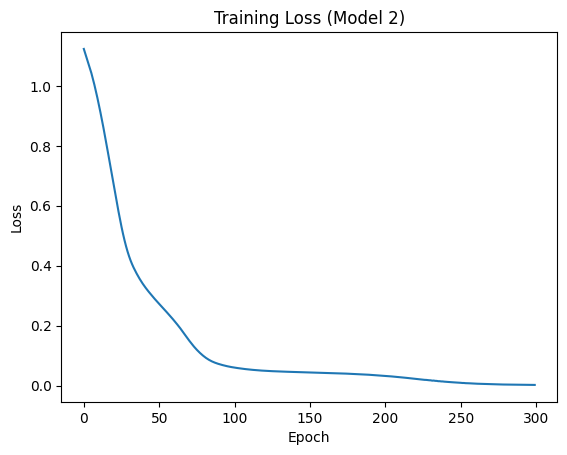

In [6]:
import torch.optim as optim
import matplotlib.pyplot as plt

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_2.parameters(), lr=0.01)

# Training loop
epochs = 300
losses_2 = []

for epoch in range(epochs):
    model_2.train()
    y_pred = model_2(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses_2.append(loss.item())
    if (epoch + 1) % 50 == 0:
        print(f'Model 2 - Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Plot loss
plt.plot(losses_2)
plt.title('Training Loss (Model 2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Evaluation of the Models

### **For model_1**

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

model_1.eval()
with torch.no_grad():
    y_test_pred = model_1(X_test_tensor)
    _, predicted = torch.max(y_test_pred, 1)

accuracy_1 = accuracy_score(y_test_tensor, predicted)
conf_matrix_1 = confusion_matrix(y_test_tensor, predicted)

print(f'Model 1 Accuracy: {accuracy_1 * 100:.2f}%')
print('Confusion Matrix:\n', conf_matrix_1)

Model 1 Accuracy: 100.00%
Confusion Matrix:
 [[11  0  0]
 [ 0 11  0]
 [ 0  0  8]]


### **For model_2**

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

model_2.eval()
with torch.no_grad():
    y_test_pred = model_2(X_test_tensor)
    _, predicted = torch.max(y_test_pred, 1)

accuracy_2 = accuracy_score(y_test_tensor, predicted)
conf_matrix_2 = confusion_matrix(y_test_tensor, predicted)

print(f'Model 2 Accuracy: {accuracy_2 * 100:.2f}%')
print('Confusion Matrix:\n', conf_matrix_2)

Model 2 Accuracy: 100.00%
Confusion Matrix:
 [[11  0  0]
 [ 0 11  0]
 [ 0  0  8]]
